In [1]:
# Native
import math
import os

# Data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.tree import plot_tree
import joblib

In [2]:
# Check .csv files
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input\gender_submission.csv
./input\test.csv
./input\train.csv


In [3]:
df = pd.read_csv("./input/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
sns.set_theme(style='darkgrid')

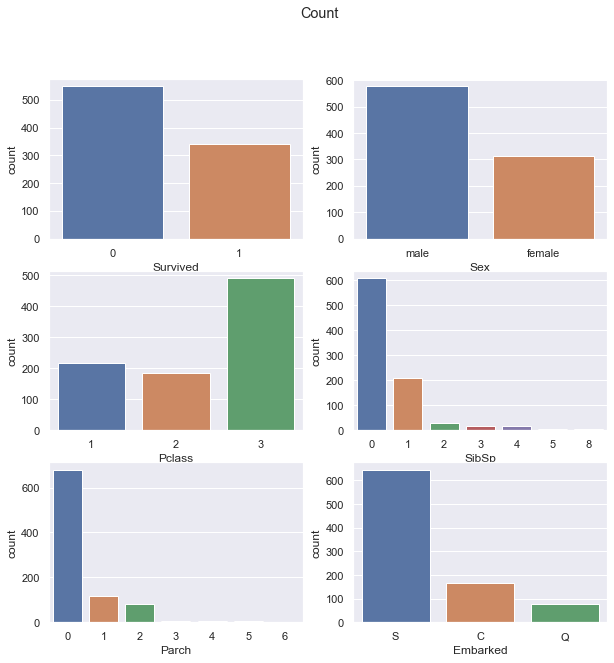

In [6]:
columns = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
n_rows = math.ceil(len(columns)/2)
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
fig.suptitle('Count')

i = 0
for row in range(n_rows):
    for col in range(n_cols):
        sns.countplot(ax=axes[row, col], data=df, x=columns[i])
        i += 1

<AxesSubplot:xlabel='Fare', ylabel='Count'>

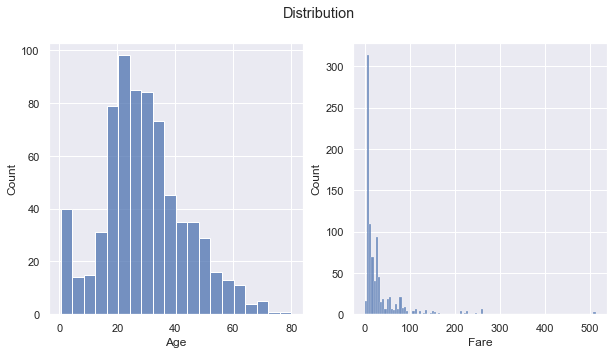

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Distribution')

sns.histplot(ax=axes[0], data=df, x='Age')
sns.histplot(ax=axes[1], data=df, x='Fare')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Drop columns

columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df = df.drop(columns=columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [10]:
# Delete null rows

df = df.dropna()

In [11]:
# Split X and y

X = df.drop(columns=['Survived'])
y = df['Survived']

In [12]:
# One hot encode categorical columns

columns = ['Pclass', 'Sex']

for col in columns:
    one_hot = pd.get_dummies(df[col], prefix=col)
    X = X.drop(columns=[col])
    X = X.join(one_hot)
X

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,0,0,1,0,1
1,38.0,1,0,0,1,0
2,26.0,0,0,1,1,0
3,35.0,1,0,0,1,0
4,35.0,0,0,1,0,1
...,...,...,...,...,...,...
885,39.0,0,0,1,1,0
886,27.0,0,1,0,0,1
887,19.0,1,0,0,1,0
889,26.0,1,0,0,0,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro')

(0.8232558139534883, 0.8088620625116976)

In [15]:
confusion_matrix(y_test, y_pred)

array([[118,  17],
       [ 21,  59]], dtype=int64)

In [16]:
# Decision tree
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro')

(0.8325581395348837, 0.8189219539584502)

In [17]:
confusion_matrix(y_test, y_pred)

array([[119,  16],
       [ 20,  60]], dtype=int64)

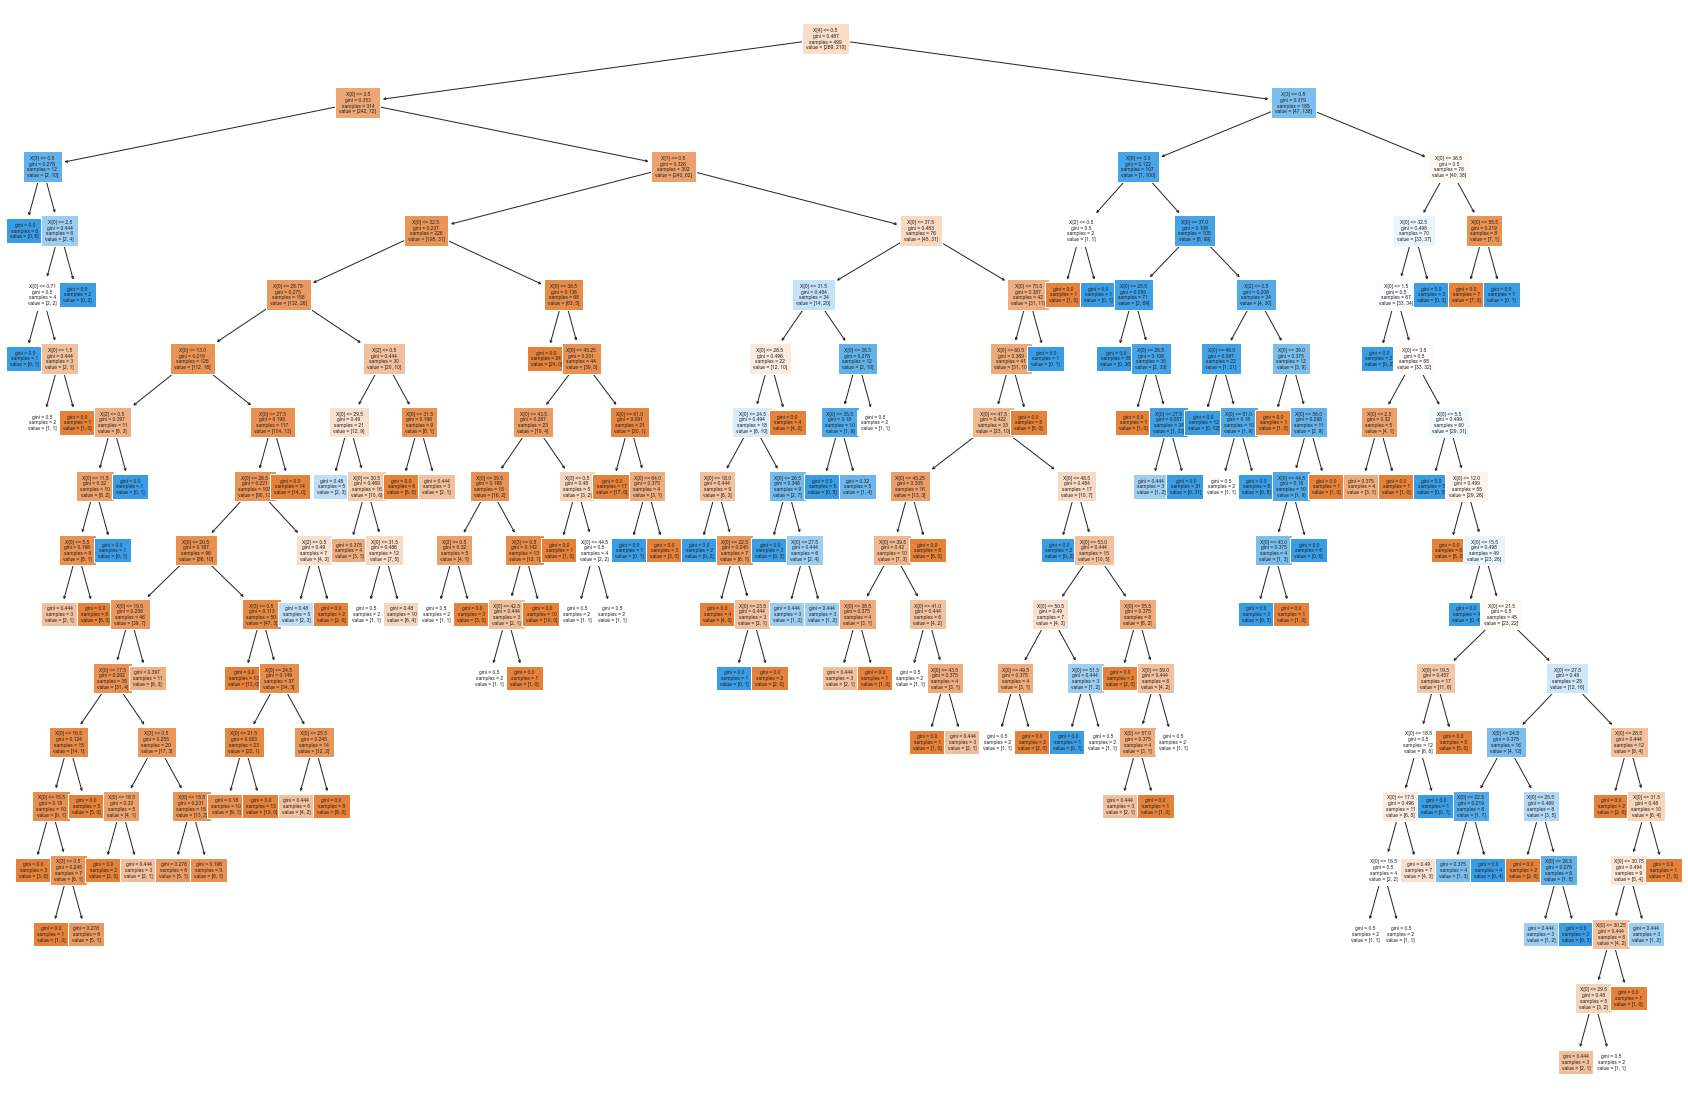

In [18]:
f = plt.figure()
plot_tree(dt, filled=True, fontsize=5)
f.set_figwidth(30)
f.set_figheight(20)
plt.show()

In [22]:
filename = './model/dt.sav'
joblib.dump(dt, filename)

['./model/dt.sav']